In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
d1=pd.read_csv('churn.csv')

In [3]:
d1.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
d2=pd.read_csv('test_set.csv')

In [5]:
d2.head()

,row_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,IL,119,area_code_408,no,no,0,197.2,111,33.52,...,84,9.44,4.2,2,1.13,1,NaN,NaN,NaN,NaN
1,2,WA,54,area_code_415,no,yes,28,217.4,98,36.96,...,92,5.72,7.5,8,2.03,1,NaN,NaN,NaN,NaN
2,3,NJ,60,area_code_415,yes,no,0,97.2,91,16.52,...,116,10.58,10.1,2,2.73,1,NaN,NaN,NaN,NaN
3,4,WI,111,area_code_415,no,yes,23,87.7,91,14.91,...,87,7.79,12.3,4,3.32,1,NaN,NaN,NaN,NaN
4,5,WV,119,area_code_415,no,yes,32,186.4,75,31.69,...,80,6.78,12.1,2,3.27,1,NaN,NaN,NaN,NaN


In [6]:
RowID = d2['row_id']

In [7]:
d1.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,100.856250,8.051500,180.147150,100.259250,30.625570,200.80115,100.13475,17.068300,201.069275,100.212500,9.048203,10.267075,4.459500,2.772637,1.556750
std,39.589493,13.661204,54.399753,19.995274,9.247926,50.56086,19.85562,4.297672,50.724508,19.775505,2.282631,2.772431,2.465843,0.748482,1.306027
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.900000,87.000000,24.460000,166.57500,87.00000,14.157500,167.300000,87.000000,7.530000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.750000,101.000000,30.560000,201.10000,100.00000,17.090000,200.950000,100.000000,9.045000,10.350000,4.000000,2.795000,1.000000
75%,127.000000,19.000000,216.200000,114.000000,36.750000,234.90000,114.00000,19.970000,235.525000,114.000000,10.600000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.70000,170.00000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
d2.describe()

,row_id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,500.500000,97.868000,6.570000,180.855900,99.110000,30.746060,199.978200,100.416000,16.998410,197.68100,98.746000,8.89585,10.240600,4.33800,2.765430,1.625000,NaN,NaN,NaN,NaN
std,288.819436,40.042852,13.016395,51.847867,19.142998,8.814114,50.533007,19.717853,4.295221,49.66575,20.643683,2.23491,2.718073,2.41901,0.733861,1.306937,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,6.600000,34.000000,1.120000,47.300000,38.000000,4.020000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,250.750000,70.750000,0.000000,143.150000,87.000000,24.332500,165.575000,87.000000,14.077500,165.10000,86.000000,7.43000,8.500000,3.00000,2.300000,1.000000,NaN,NaN,NaN,NaN
50%,500.500000,98.000000,0.000000,181.250000,99.000000,30.810000,200.400000,100.500000,17.030000,197.90000,99.000000,8.90500,10.300000,4.00000,2.780000,1.000000,NaN,NaN,NaN,NaN
75%,750.250000,125.000000,0.000000,215.550000,112.000000,36.647500,231.525000,113.000000,19.682500,230.12500,112.000000,10.35250,12.000000,6.00000,3.240000,2.000000,NaN,NaN,NaN,NaN
max,1000.000000,238.000000,52.000000,332.100000,160.000000,56.460000,359.300000,155.000000,30.540000,355.10000,165.000000,15.98000,19.700000,18.00000,5.320000,7.000000,NaN,NaN,NaN,NaN


In [9]:
d1.shape

(4000, 20)

In [10]:
d2.shape

(1000, 24)

In [11]:
d3 = d2.dropna(how='all', axis='columns')

In [12]:
d3 = d3.set_index('row_id')

In [13]:
d3.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
row_id,,,,,,,,,,,,,,,,,,,
1,IL,119,area_code_408,no,no,0,197.2,111,33.52,168.1,78,14.29,209.8,84,9.44,4.2,2,1.13,1
2,WA,54,area_code_415,no,yes,28,217.4,98,36.96,246.2,120,20.93,127.0,92,5.72,7.5,8,2.03,1
3,NJ,60,area_code_415,yes,no,0,97.2,91,16.52,243.7,93,20.71,235.0,116,10.58,10.1,2,2.73,1
4,WI,111,area_code_415,no,yes,23,87.7,91,14.91,218.3,118,18.56,173.1,87,7.79,12.3,4,3.32,1
5,WV,119,area_code_415,no,yes,32,186.4,75,31.69,206.9,92,17.59,150.6,80,6.78,12.1,2,3.27,1


In [14]:
d3.shape

(1000, 19)

In [15]:
d1['churn_p'] = np.where(d1['churn'] == 'yes', 1, 0)

In [16]:
d1.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,churn_p
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,0
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0


In [17]:
Y = d1['churn_p']

In [18]:
X = pd.get_dummies(d3)

In [19]:
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
row_id,,,,,,,,,,,,,,,,,,,,,
1,119,0,197.2,111,33.52,168.1,78,14.29,209.8,84,...,0,0,0,1,0,0,1,0,1,0
2,54,28,217.4,98,36.96,246.2,120,20.93,127.0,92,...,0,0,0,0,1,0,1,0,0,1
3,60,0,97.2,91,16.52,243.7,93,20.71,235.0,116,...,0,0,0,0,1,0,0,1,1,0
4,111,23,87.7,91,14.91,218.3,118,18.56,173.1,87,...,1,0,0,0,1,0,1,0,0,1
5,119,32,186.4,75,31.69,206.9,92,17.59,150.6,80,...,0,1,0,0,1,0,1,0,0,1


In [20]:
X.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

In [21]:
X['daily_minutes'] = X['total_day_minutes'] + X['total_night_minutes'] + X['total_eve_minutes']
X['daily_charge'] = X['total_day_charge']+ X['total_night_charge'] + X['total_eve_charge']
X['total_calls'] = X['total_day_calls']+ X['total_night_calls'] + X['total_eve_calls'] + X['total_intl_calls']

X2 = X.drop(['number_vmail_messages', 'total_day_minutes', 'total_night_minutes', 'total_eve_minutes', 'total_day_charge','total_night_charge', 
           'total_eve_charge', 'total_day_calls', 'total_night_calls', 'total_eve_calls', 'voice_mail_plan_no', 'international_plan_no', 
              'voice_mail_plan_yes', 'international_plan_yes', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY'], axis=1)

In [22]:
X2.head()

,account_length,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,daily_minutes,daily_charge,total_calls
row_id,,,,,,,,,,,
1,119,4.2,2,1.13,1,1,0,0,575.1,57.25,275
2,54,7.5,8,2.03,1,0,1,0,590.6,63.61,318
3,60,10.1,2,2.73,1,0,1,0,575.9,47.81,302
4,111,12.3,4,3.32,1,0,1,0,479.1,41.26,300
5,119,12.1,2,3.27,1,0,1,0,543.9,56.06,249


In [23]:
X_scale_T=X2[['total_intl_minutes','total_intl_calls', 'number_customer_service_calls',
               'daily_minutes', 'daily_charge', 'total_calls', 'total_intl_charge']]

In [24]:
s_scaler = preprocessing.StandardScaler()
Scaled_X= s_scaler.fit_transform(X_scale_T)

In [25]:
X4 = pd.DataFrame(Scaled_X,columns=['total_intl_minutes_s','total_intl_calls_s', 'number_customer_service_calls_s',
               'daily_minutes_s', 'daily_charge_s', 'total_calls_s', 'total_intl_charge_s'])

In [26]:
X4.head()

,total_intl_minutes_s,total_intl_calls_s,number_customer_service_calls_s,daily_minutes_s,daily_charge_s,total_calls_s,total_intl_charge_s
0,-2.223496,-0.966995,-0.478457,-0.039310,0.061095,-0.814024,-2.229644
1,-1.008792,1.514600,-0.478457,0.139106,0.698423,0.453743,-1.002640
2,-0.051754,-0.966995,-0.478457,-0.030102,-0.884876,-0.017985,-0.048303
3,0.758048,-0.139797,-0.478457,-1.144339,-1.541244,-0.076951,0.756066
4,0.684430,-0.966995,-0.478457,-0.398445,-0.058153,-1.580581,0.687899


In [27]:
X4 = pd.concat([X2,X4], axis=1)

In [28]:
X5 = X4.drop(['total_intl_minutes','total_intl_calls', 'number_customer_service_calls',
               'daily_minutes', 'daily_charge', 'total_calls',
             'total_intl_charge', 'account_length'],axis=1)

In [29]:
X5.head()

,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_intl_minutes_s,total_intl_calls_s,number_customer_service_calls_s,daily_minutes_s,daily_charge_s,total_calls_s,total_intl_charge_s
0,NaN,NaN,NaN,-2.223496,-0.966995,-0.478457,-0.039310,0.061095,-0.814024,-2.229644
1,1.0,0.0,0.0,-1.008792,1.514600,-0.478457,0.139106,0.698423,0.453743,-1.002640
2,0.0,1.0,0.0,-0.051754,-0.966995,-0.478457,-0.030102,-0.884876,-0.017985,-0.048303
3,0.0,1.0,0.0,0.758048,-0.139797,-0.478457,-1.144339,-1.541244,-0.076951,0.756066
4,0.0,1.0,0.0,0.684430,-0.966995,-0.478457,-0.398445,-0.058153,-1.580581,0.687899


In [30]:
X5.columns

Index(['area_code_area_code_408', 'area_code_area_code_415',
       'area_code_area_code_510', 'total_intl_minutes_s', 'total_intl_calls_s',
       'number_customer_service_calls_s', 'daily_minutes_s', 'daily_charge_s',
       'total_calls_s', 'total_intl_charge_s'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
X5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 10 columns):
area_code_area_code_408            1000 non-null float64
area_code_area_code_415            1000 non-null float64
area_code_area_code_510            1000 non-null float64
total_intl_minutes_s               1000 non-null float64
total_intl_calls_s                 1000 non-null float64
number_customer_service_calls_s    1000 non-null float64
daily_minutes_s                    1000 non-null float64
daily_charge_s                     1000 non-null float64
total_calls_s                      1000 non-null float64
total_intl_charge_s                1000 non-null float64
dtypes: float64(10)
memory usage: 86.0 KB


In [33]:
X5.dtypes

area_code_area_code_408            float64
area_code_area_code_415            float64
area_code_area_code_510            float64
total_intl_minutes_s               float64
total_intl_calls_s                 float64
number_customer_service_calls_s    float64
daily_minutes_s                    float64
daily_charge_s                     float64
total_calls_s                      float64
total_intl_charge_s                float64
dtype: object

In [34]:
X6 = pd.concat([Y,X5], axis=1)

In [35]:
X3 = X6.replace([np.inf, -np.inf], np.nan).fillna(X6.mean())

In [36]:
X3.head()

,churn_p,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_intl_minutes_s,total_intl_calls_s,number_customer_service_calls_s,daily_minutes_s,daily_charge_s,total_calls_s,total_intl_charge_s
0,0,0.255,0.512,0.233,-2.223496,-0.966995,-0.478457,-0.039310,0.061095,-0.814024,-2.229644
1,0,1.000,0.000,0.000,-1.008792,1.514600,-0.478457,0.139106,0.698423,0.453743,-1.002640
2,0,0.000,1.000,0.000,-0.051754,-0.966995,-0.478457,-0.030102,-0.884876,-0.017985,-0.048303
3,0,0.000,1.000,0.000,0.758048,-0.139797,-0.478457,-1.144339,-1.541244,-0.076951,0.756066
4,0,0.000,1.000,0.000,0.684430,-0.966995,-0.478457,-0.398445,-0.058153,-1.580581,0.687899


In [37]:
X3.shape

(4000, 11)

In [38]:
Y.shape

(4000,)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size=0.3, random_state=100)

In [40]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lm.intercept_[0]

-3.8702582701041273

In [42]:
pd.DataFrame(lm.coef_.T,X3.columns,columns=['Coefficient'])

,Coefficient
churn_p,8.980505
area_code_area_code_408,-1.167697
area_code_area_code_415,-1.554621
area_code_area_code_510,-1.147939
total_intl_minutes_s,0.012860
total_intl_calls_s,0.000862
number_customer_service_calls_s,-0.013752
daily_minutes_s,-0.028567
daily_charge_s,0.032111
total_calls_s,-0.003775


In [43]:
pred_lm = lm.predict(X_test)
predictions=pd.DataFrame(pred_lm, columns=['churn'])

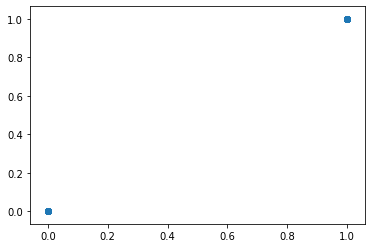

In [44]:
plt.scatter(y_test,predictions)
plt.show()

In [45]:
predictions

,churn
0,0
1,0
2,0
3,0
4,0
...,...
1195,1
1196,0
1197,0
1198,0


In [46]:
X7 = pd.concat([RowID, predictions.churn], axis=1)
Final = X7.dropna(how='any', axis=0)

In [47]:
Final['churn'] = np.where(Final['churn'] == 1, 'Yes', 'No')
Final.set_index('row_id')

,churn
row_id,
1.0,No
2.0,No
3.0,No
4.0,No
5.0,No
...,...
996.0,Yes
997.0,No
998.0,Yes


In [48]:
Final.loc[Final.churn == 'Yes'].set_index('row_id')

,churn
row_id,
9.0,Yes
13.0,Yes
20.0,Yes
30.0,Yes
45.0,Yes
...,...
993.0,Yes
996.0,Yes
998.0,Yes


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, pred_lm)

array([[1023,    0],
       [   0,  177]], dtype=int64)

In [50]:
labels = ['Yes', 'No']
pd.DataFrame(data=confusion_matrix(y_test, pred_lm), index=labels, columns=labels)

,Yes,No
Yes,1023,0
No,0,177


In [51]:
print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['Yes', 'No']))
print()
print("Accuracy Score is:" , metrics.accuracy_score(y_test, pred_lm))

Classification Report
              precision    recall  f1-score   support

         Yes       1.00      1.00      1.00      1023
          No       1.00      1.00      1.00       177

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Accuracy Score is: 1.0


In [52]:
predictions[predictions['churn'] == 0].count() 

churn    1023
dtype: int64

In [53]:
predictions[predictions['churn'] == 1].count() 

churn    177
dtype: int64

In [54]:
test_set = pd.read_csv('test_set.csv')
test_set.head(5)

,row_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,IL,119,area_code_408,no,no,0,197.2,111,33.52,...,84,9.44,4.2,2,1.13,1,NaN,NaN,NaN,NaN
1,2,WA,54,area_code_415,no,yes,28,217.4,98,36.96,...,92,5.72,7.5,8,2.03,1,NaN,NaN,NaN,NaN
2,3,NJ,60,area_code_415,yes,no,0,97.2,91,16.52,...,116,10.58,10.1,2,2.73,1,NaN,NaN,NaN,NaN
3,4,WI,111,area_code_415,no,yes,23,87.7,91,14.91,...,87,7.79,12.3,4,3.32,1,NaN,NaN,NaN,NaN
4,5,WV,119,area_code_415,no,yes,32,186.4,75,31.69,...,80,6.78,12.1,2,3.27,1,NaN,NaN,NaN,NaN


In [55]:
test_set.shape

(1000, 24)

In [56]:
Final.shape

(1000, 2)

In [57]:
predictions.shape

(1200, 1)

In [58]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
row_id                           1000 non-null int64
state                            1000 non-null object
account_length                   1000 non-null int64
area_code                        1000 non-null object
international_plan               1000 non-null object
voice_mail_plan                  1000 non-null object
number_vmail_messages            1000 non-null int64
total_day_minutes                1000 non-null float64
total_day_calls                  1000 non-null int64
total_day_charge                 1000 non-null float64
total_eve_minutes                1000 non-null float64
total_eve_calls                  1000 non-null int64
total_eve_charge                 1000 non-null float64
total_night_minutes              1000 non-null float64
total_night_calls                1000 non-null int64
total_night_charge               1000 non-null float64
total_intl_minutes            

In [59]:
testset = test_set.dropna(how='all', axis='columns')
testset = testset.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan'], axis=1)
testset.head()

,row_id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,119,0,197.2,111,33.52,168.1,78,14.29,209.8,84,9.44,4.2,2,1.13,1
1,2,54,28,217.4,98,36.96,246.2,120,20.93,127.0,92,5.72,7.5,8,2.03,1
2,3,60,0,97.2,91,16.52,243.7,93,20.71,235.0,116,10.58,10.1,2,2.73,1
3,4,111,23,87.7,91,14.91,218.3,118,18.56,173.1,87,7.79,12.3,4,3.32,1
4,5,119,32,186.4,75,31.69,206.9,92,17.59,150.6,80,6.78,12.1,2,3.27,1


In [ ]:
test_set_pred = lm.predict(testset)